In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import requests


### SpaceX API

In [154]:
#API Integration:

#Step 1: For all launches
launches_url = "https://api.spacexdata.com/v4/launches"
rockets_url = "https://api.spacexdata.com/v4/rockets"
payloads_url = "https://api.spacexdata.com/v4/payloads"
launchpads_url = "https://api.spacexdata.com/v4/launchpads"

launches = requests.get(launches_url).json()
rockets = {r["id"]: r["name"] for r in requests.get(rockets_url).json()}
payloads = {p["id"]: p for p in requests.get(payloads_url).json()}
launchpads = {l["id"]: l for l in requests.get(launchpads_url).json()}

# Step 2: Extract Required Features
records = []

for launch in launches:
    try:
        rocket_name = rockets.get(launch["rocket"], "Unknown")
        success = launch["success"]
        launchpad_info = launchpads.get(launch["launchpad"], {})
        country = launchpad_info.get("region", "Unknown")

        # Skip if no payloads are listed
        if not launch["payloads"]:
            continue

        # Use first payload for simplicity (extendable later)
        payload_id = launch["payloads"][0]
        pl = payloads.get(payload_id, {})

        payload_mass = pl.get("mass_kg")
        payload_type = pl.get("type")
        orbit = pl.get("orbit")
        reused = pl.get("reused", False)

        records.append({
            "Mission Name": launch["name"],
            "Rocket Type": rocket_name,
            "Reusability": reused,
            "Payload Mass (kg)": payload_mass,
            "Payload Type": payload_type,
            "Orbit": orbit,
            "Country": country,
            "Launch Success": int(success) if success is not None else None,
            "Date": launch["date_utc"]
        })
    except Exception as e:
        print(f"Error processing launch {launch.get('name', 'Unknown')}: {e}")


# Step 3: Convert to DataFrame and Save
spacex_df = pd.DataFrame(records)


In [3]:
spacex_df = pd.read_csv("spacex_dataset.csv")
ucs_df = pd.read_excel("UCS-Satellite-Database 5-1-2023.xlsx")

In [4]:
spacex_df.head(20)

,mission_name,Rocket Type,Reusability,Payload Mass (kg),Payload Type,Orbit,Country,Launch Success,launch_date,launch_year
0,falconsat,Falcon 1,False,20.000000,Satellite,LEO,Marshall Islands,0.0,2006-03-24 22:30:00+00:00,2006
1,demosat,Falcon 1,False,7834.885404,Satellite,LEO,Marshall Islands,0.0,2007-03-21 01:10:00+00:00,2007
2,trailblazer,Falcon 1,False,7834.885404,Satellite,LEO,Marshall Islands,0.0,2008-08-03 03:34:00+00:00,2008
3,ratsat,Falcon 1,False,165.000000,Satellite,LEO,Marshall Islands,1.0,2008-09-28 23:15:00+00:00,2008
4,razaksat,Falcon 1,False,200.000000,Satellite,LEO,Marshall Islands,1.0,2009-07-13 03:35:00+00:00,2009
5,falcon 9 test flight,Falcon 9,False,7834.885404,Dragon Boilerplate,LEO,Florida,1.0,2010-06-04 18:45:00+00:00,2010
6,cots 1,Falcon 9,False,7834.885404,Dragon 1.0,LEO,Florida,1.0,2010-12-08 15:43:00+00:00,2010
7,cots 2,Falcon 9,False,525.000000,Dragon 1.0,LEO,Florida,1.0,2012-05-22 07:44:00+00:00,2012
8,crs-1,Falcon 9,False,400.000000,Dragon 1.0,ISS,Florida,1.0,2012-10-08 00:35:00+00:00,2012
9,crs-2,Falcon 9,False,677.000000,Dragon 1.0,ISS,Florida,1.0,2013-03-01 19:10:00+00:00,2013


In [5]:
# Fill missing numerical values
spacex_df['Payload Mass (kg)'].fillna(spacex_df['Payload Mass (kg)'].median(), inplace=True)

C:\Users\dhyan\AppData\Local\Temp\ipykernel_18804\319547193.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spacex_df['Payload Mass (kg)'].fillna(spacex_df['Payload Mass (kg)'].median(), inplace=True)


In [6]:
# Drop rows with missing Launch Success
spacex_df.dropna(subset=['Launch Success'], inplace=True)

In [7]:
# Reset index
spacex_cleaned = spacex_df.reset_index(drop=True)

In [8]:
spacex_df.shape

(186, 10)

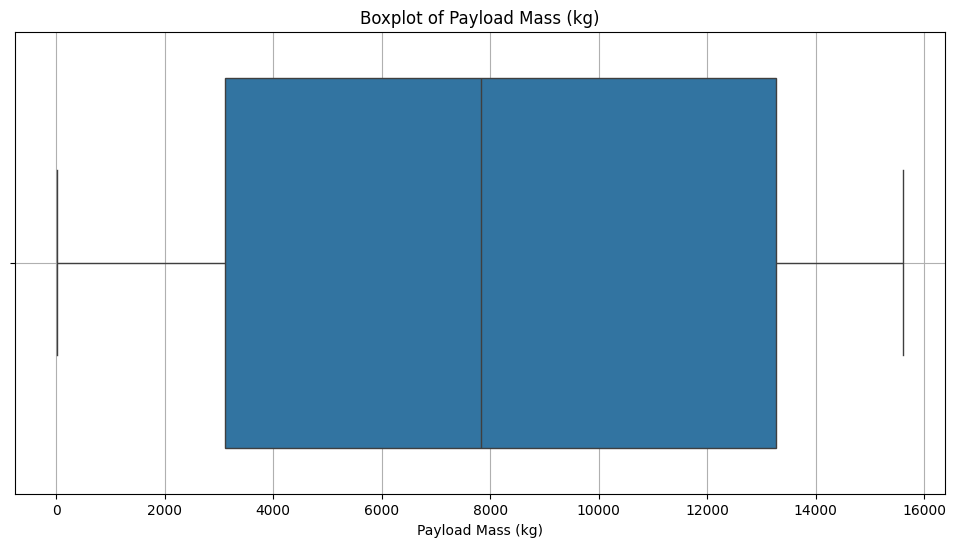

In [9]:
# Boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=spacex_df['Payload Mass (kg)'])
plt.title('Boxplot of Payload Mass (kg)')
plt.xlabel('Payload Mass (kg)')
plt.grid(True)
plt.show()


In [10]:
spacex_df.head(20)

,mission_name,Rocket Type,Reusability,Payload Mass (kg),Payload Type,Orbit,Country,Launch Success,launch_date,launch_year
0,falconsat,Falcon 1,False,20.000000,Satellite,LEO,Marshall Islands,0.0,2006-03-24 22:30:00+00:00,2006
1,demosat,Falcon 1,False,7834.885404,Satellite,LEO,Marshall Islands,0.0,2007-03-21 01:10:00+00:00,2007
2,trailblazer,Falcon 1,False,7834.885404,Satellite,LEO,Marshall Islands,0.0,2008-08-03 03:34:00+00:00,2008
3,ratsat,Falcon 1,False,165.000000,Satellite,LEO,Marshall Islands,1.0,2008-09-28 23:15:00+00:00,2008
4,razaksat,Falcon 1,False,200.000000,Satellite,LEO,Marshall Islands,1.0,2009-07-13 03:35:00+00:00,2009
5,falcon 9 test flight,Falcon 9,False,7834.885404,Dragon Boilerplate,LEO,Florida,1.0,2010-06-04 18:45:00+00:00,2010
6,cots 1,Falcon 9,False,7834.885404,Dragon 1.0,LEO,Florida,1.0,2010-12-08 15:43:00+00:00,2010
7,cots 2,Falcon 9,False,525.000000,Dragon 1.0,LEO,Florida,1.0,2012-05-22 07:44:00+00:00,2012
8,crs-1,Falcon 9,False,400.000000,Dragon 1.0,ISS,Florida,1.0,2012-10-08 00:35:00+00:00,2012
9,crs-2,Falcon 9,False,677.000000,Dragon 1.0,ISS,Florida,1.0,2013-03-01 19:10:00+00:00,2013


In [11]:
spacex_df.isnull().sum()


mission_name         0
Rocket Type          0
Reusability          0
Payload Mass (kg)    0
Payload Type         0
Orbit                0
Country              0
Launch Success       0
launch_date          0
launch_year          0
dtype: int64

In [12]:
spacex_df.to_csv("spacex_dataset_cleaned.csv", index=False)

### UCS Space Dataset

In [13]:
ucs_df = pd.read_excel("UCS-Satellite-Database 5-1-2023.xlsx")
ucs_df.head()

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAC AIS-Sat1 (Kelpie 1),AAC AIS-Sat1 (Kelpie 1),United Kingdom,United Kingdom,AAC Clyde Space,Commercial,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAt-4,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ucs_df.shape

(7560, 68)

In [15]:
ucs_df.isnull().sum()

Name of Satellite, Alternate Names       0
Current Official Name of Satellite       0
Country/Org of UN Registry               1
Country of Operator/Owner                0
Operator/Owner                           0
                                      ... 
Unnamed: 63                           7075
Unnamed: 64                           7075
Unnamed: 65                           7075
Unnamed: 66                           7073
Unnamed: 67                           7075
Length: 68, dtype: int64

In [25]:
# Drop columns with "Unnamed" or >90% missing
ucs_df_cleaned = ucs_df.drop(columns=[
    col for col in ucs_df.columns if "Unnamed" in col or ucs_df[col].isna().sum() > 0.9 * len(ucs_df)
])


In [27]:
# Fill missing numerical with median
num_cols = ucs_df_cleaned.select_dtypes(include='number').columns
ucs_df_cleaned[num_cols] = ucs_df_cleaned[num_cols].fillna(ucs_df_cleaned[num_cols].median())

In [28]:
# Fill missing categorical with "Unknown"
cat_cols = ucs_df_cleaned.select_dtypes(include='object').columns
ucs_df_cleaned[cat_cols] = ucs_df_cleaned[cat_cols].fillna("Unknown")

In [30]:
# Drop rows with invalid launch dates
ucs_df_cleaned = ucs_df_cleaned.dropna(subset=['Date of Launch']).reset_index(drop=True)

In [31]:
ucs_df_cleaned.isnull().sum()

Name of Satellite, Alternate Names    0
Current Official Name of Satellite    0
Country/Org of UN Registry            0
Country of Operator/Owner             0
Operator/Owner                        0
Users                                 0
Purpose                               0
Detailed Purpose                      0
Class of Orbit                        0
Type of Orbit                         0
Longitude of GEO (degrees)            0
Perigee (km)                          0
Apogee (km)                           0
Eccentricity                          0
Inclination (degrees)                 0
Period (minutes)                      0
Launch Mass (kg.)                     0
Dry Mass (kg.)                        0
Date of Launch                        0
Expected Lifetime (yrs.)              0
Contractor                            0
Country of Contractor                 0
Launch Site                           0
Launch Vehicle                        0
COSPAR Number                         0


In [33]:
ucs_df_cleaned.columns

Index(['Name of Satellite, Alternate Names',
       'Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Date of Launch',
       'Expected Lifetime (yrs.)', 'Contractor', 'Country of Contractor',
       'Launch Site', 'Launch Vehicle', 'COSPAR Number', 'NORAD Number',
       'Comments', 'Source Used for Orbital Data', 'Source', 'Source.2',
       'Source.3'],
      dtype='object')

In [34]:
ucs_df.head()

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data,Source,Source.2,Source.3
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,...,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859,Pathfinder for planned earth observation const...,JMSatcat/3_20,https://spaceflightnow.com/2019/12/11/indias-5...,NaN,NaN
1,AAC AIS-Sat1 (Kelpie 1),AAC AIS-Sat1 (Kelpie 1),United Kingdom,United Kingdom,AAC Clyde Space,Commercial,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,Sweden/UK/USA/Netherlands,Cape Canaveral,Falcon 9,2023-001DC,55107,Provide AIS information to Orbcomm.,JMSatcat/9_23,https://www.aac-clyde.space/articles/aac-clyde...,NaN,NaN
2,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,...,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775,Technology development and education.,JMSatcat/10_17,https://directory.eoportal.org/web/eoportal/sa...,http://www.planet4589.org/space/log/satcat.txt,NaN
3,AAt-4,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,Denmark,Guiana Space Center,Soyuz-2.1a,2016-025E,41460,Carries AIS system.,Space50,http://spaceflightnow.com/2016/04/26/soyuz-bla...,http://space50.org/objekt.php?mot=2016-025E&ja...,NaN
4,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transpond...",ZARYA,http://www.absatellite.net/satellite-fleet/?sa...,http://www.zarya.info/Diaries/Launches/Launche...,http://www.absatellite.net/2010/10/13/asia-bro...


### Merging Datasets

In [38]:
# Ensure both are datetime before using .dt
spacex_cleaned['launch_date'] = pd.to_datetime(spacex_cleaned['launch_date'], errors='coerce')
ucs_df_cleaned['Date of Launch'] = pd.to_datetime(ucs_df_cleaned['Date of Launch'], errors='coerce')

# Now extract only the date part
spacex_cleaned['merge_date'] = spacex_cleaned['launch_date'].dt.date
ucs_df_cleaned['merge_date'] = ucs_df_cleaned['Date of Launch'].dt.date

In [39]:
# Perform the inner merge on date and rocket name
merged_df = pd.merge(
    spacex_cleaned,
    ucs_df_cleaned,
    left_on=['merge_date', 'Rocket Type'],
    right_on=['merge_date', 'Launch Vehicle'],
    how='inner'
)

In [40]:
merged_df.shape

(3031, 42)

In [41]:
merged_df.isnull().sum()

mission_name                          0
Rocket Type                           0
Reusability                           0
Payload Mass (kg)                     0
Payload Type                          0
Orbit                                 0
Country                               0
Launch Success                        0
launch_date                           0
launch_year                           0
merge_date                            0
Name of Satellite, Alternate Names    0
Current Official Name of Satellite    0
Country/Org of UN Registry            0
Country of Operator/Owner             0
Operator/Owner                        0
Users                                 0
Purpose                               0
Detailed Purpose                      0
Class of Orbit                        0
Type of Orbit                         0
Longitude of GEO (degrees)            0
Perigee (km)                          0
Apogee (km)                           0
Eccentricity                          0


In [42]:
# Drop the helper column
merged_df.drop(columns=['merge_date'], inplace=True)

In [43]:
merged_df.columns

Index(['mission_name', 'Rocket Type', 'Reusability', 'Payload Mass (kg)',
       'Payload Type', 'Orbit', 'Country', 'Launch Success', 'launch_date',
       'launch_year', 'Name of Satellite, Alternate Names',
       'Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Date of Launch',
       'Expected Lifetime (yrs.)', 'Contractor', 'Country of Contractor',
       'Launch Site', 'Launch Vehicle', 'COSPAR Number', 'NORAD Number',
       'Comments', 'Source Used for Orbital Data', 'Source', 'Source.2',
       'Source.3'],
      dtype='object')

In [44]:
merged_df.to_csv("final_dataset.csv", index=False)